# Radoslav Nikolov
```
Additional tasks
```

## Problem 1. Gas consumption

In [4]:
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [5]:
gas_data = pd.read_table("temp_gas.csv")
gas_data

,temp_diff,power
0,10.3,69.81
1,11.4,82.75
2,11.5,81.75
3,12.5,80.38
4,13.1,85.89
5,13.4,75.32
6,13.6,69.81
7,15.0,78.54
8,15.2,81.29
9,15.3,99.20


The data appears to be clean - there are no missing values. We cannot be sure if there are any erroneous values (such as "human errors"). We can check for outliers by plotting histograms or boxplots.

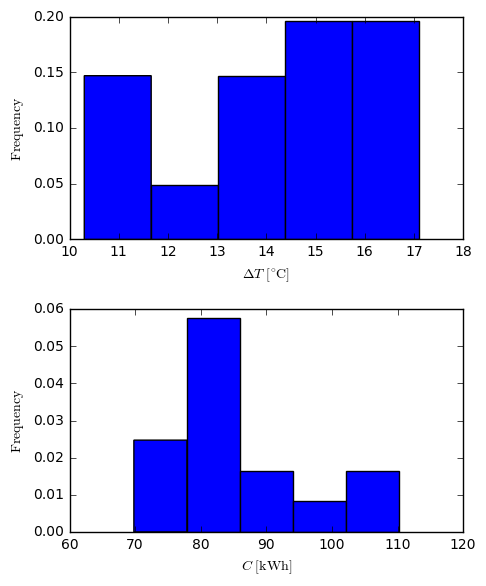

In [6]:
f,(ax1,ax2) = plt.subplots(2,1, figsize = (5,6))
ax1.hist(gas_data["temp_diff"], bins = 5, normed = 1)
ax1.set_xlabel(r"$\Delta T\ [^{\circ} \mathrm{C}]$")
ax1.set_ylabel(r"$\mathrm{Frequency}$")

ax2.hist(gas_data["power"], bins = 5, normed = 1)
ax2.set_xlabel(r"$C\ [\mathrm{kWh}]$")
ax2.set_ylabel(r"$\mathrm{Frequency}$")

f.tight_layout()
plt.show()


Indeed, there are no outliers.
### Correlation
To see if there is any correlation between the two variables, we'll plot $C = f(T)$

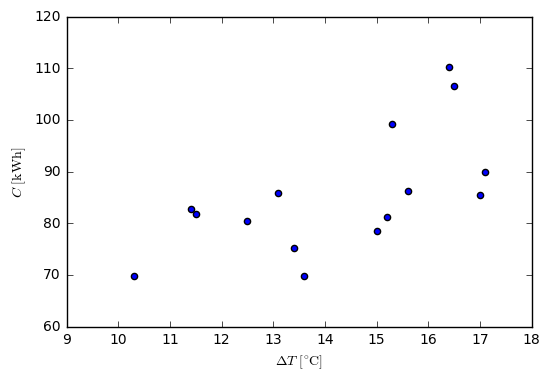

In [7]:
plt.scatter(gas_data["temp_diff"], gas_data["power"])
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.show()

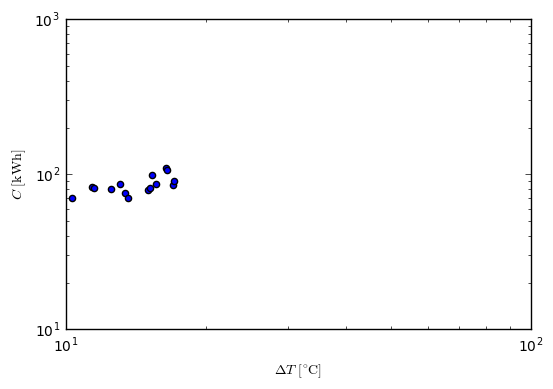

In [8]:
plt.scatter(gas_data["temp_diff"], gas_data["power"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.show()

There appears to be an upward trend. To see how strong it is, we will check the Pearson correlation coefficient.

In [9]:
corr = np.corrcoef(gas_data["temp_diff"], gas_data["power"])[1][0]
print("Correlation: " + str(corr))

Correlation: 0.626803947457


This indicates a positive correlation, that is, the gas consumption tends to increase when the temperature difference increases.

We can also add a trendline to the plot.

3.41274032684 36.8936562725 0.626803947457 0.0123969045057 1.17661931889


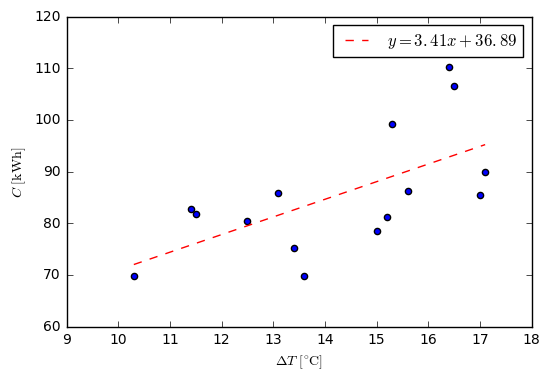

Correlation: 0.626803947457
Coefficient of determination: 0.392883188547


In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gas_data["temp_diff"], gas_data["power"])
print(slope, intercept, r_value, p_value, std_err)
plt.scatter(gas_data["temp_diff"], gas_data["power"], label=None)
regr_label = r"$y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2)) + "$"
plt.plot(gas_data["temp_diff"], gas_data["temp_diff"] * slope + intercept, color = 'r', linestyle = '--', label = regr_label)
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.legend()
plt.show()

print("Correlation: " + str(corr))
print("Coefficient of determination: " + str(r_value**2))


### This indicates a positive correlation, that is, the gas consumption tends to increase when the temperature difference increases.
http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

#### stats.linregress documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

Parameters:	
```
x, y : array_like
Two sets of measurements. Both arrays should have the same length. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2. The two sets of measurements are then found by splitting the array along the length-2 dimension.
```

Returns:
```
slope : float
slope of the regression line

intercept : float
intercept of the regression line

rvalue : float
correlation coefficient

pvalue : float
two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.

stderr : float
Standard error of the estimated gradient.
```


## Problem 2. Cloud Seeding

In [14]:
cloud_data = pd.read_table("clouds.csv")
cloud_data.columns = ["unseeded", "seeded"]
cloud_data

,unseeded,seeded
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4
5,244.3,489.1
6,163.0,430.0
7,147.8,334.1
8,95.0,302.8
9,87.0,274.7


Let's see how the values are distributed, again using histograms.

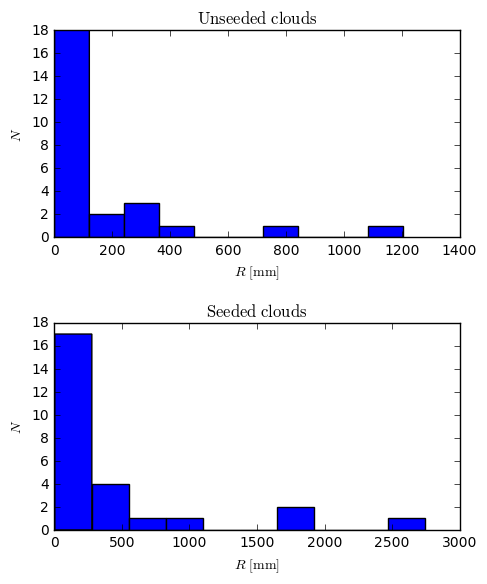

In [17]:
f,(ax1, ax2) = plt.subplots(2,1, figsize=(5,6))
ax1.hist(cloud_data["unseeded"])
ax1.set_xlabel(r"$R\ [\mathrm{mm}]$")
ax1.set_ylabel("$N$")
ax1.set_title("$\mathrm{Unseeded\ clouds}$")

ax2.hist(cloud_data["seeded"])
ax2.set_xlabel(r"$R\ [\mathrm{mm}]$")
ax2.set_ylabel("$N$")
ax2.set_title("$\mathrm{Seeded\ clouds}$")

f.tight_layout()
plt.show()

The distributions may look the same but the units on the x axis are different. Looking at it, we can see that the seeded clouds have a much greater range.

To see the two distributions better, we can plot them together.

f,ax = plt.subplots(figsize = (5,6))
bin_width = 200
unseeded_bins = np.arange(min(cloud_data["unseeded"]), max(cloud_data["unseeded"]) + bin_width, bin_width)
seeded_bins = np.arange(min(cloud_data["seeded"]), max(cloud_data["seeded"]) + bin_width, bin_width)
ax.hist(cloud_data["unseeded"], bins = unseeded_bins, alpha = 0.5, label = "$\mathrm{unseeded}$")
ax.hist(cloud_data["seeded"], bins = seeded_bins, alpha = 0.5, label = "$\mathrm{seeded}$")
ax.set_xlabel("$R\ [\mathrm{mm}]$")
ax.set_ylabel("$N$")
ax.legend()

f.tight_layout()
plt.show()

Now we can see that the two distributions have very different ranges. We have to normalize these ranges in order to get meaningful results. The model we're going to run also requires normalized ranges.

A data transformation we can try is logarithm. It has the property of "shrinking" vast spans of data.

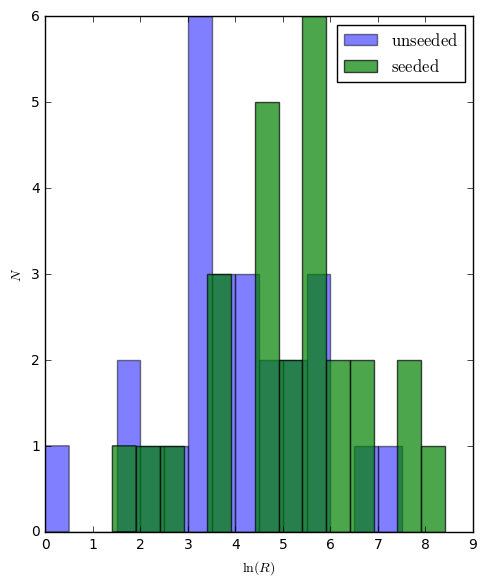

In [53]:
cloud_data["log_unseeded"] = np.log(cloud_data["unseeded"])
cloud_data["log_seeded"] = np.log(cloud_data["seeded"])

f, ax = plt.subplots(figsize = (5,6))
bin_width = 0.5
log_unseeded_bins = np.arange(min(cloud_data["log_unseeded"]), max(cloud_data["log_unseeded"]) + bin_width, bin_width)
log_seeded_bins = np.arange(min(cloud_data["log_seeded"]), max(cloud_data["log_seeded"]) + bin_width, bin_width)
ax.hist(cloud_data["log_unseeded"], bins = log_unseeded_bins, alpha = 0.5, label = "$\mathrm{unseeded}$")
ax.hist(cloud_data["log_seeded"], bins = log_seeded_bins, alpha = 0.7, label = "$\mathrm{seeded}$")
ax.set_xlabel(r"$\ln(R)$")
ax.set_ylabel(r"$N$")
ax.legend()

f.tight_layout()
plt.show()


Now the two distributions are both comparable (have similar ranges) and similar to normal. We can see that the seeded clouds appear to have more rainfall. We can see this better in a boxplot.

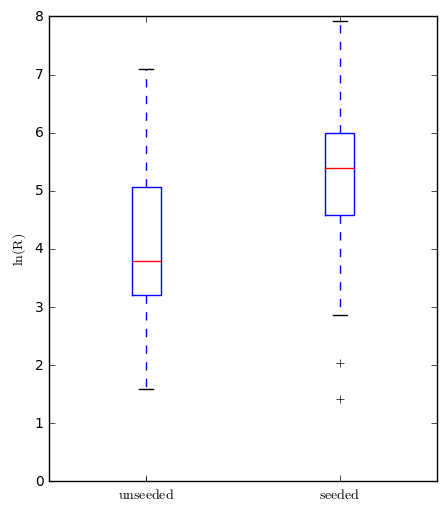

In [56]:
f, ax = plt.subplots(figsize = (5,6))
ax.boxplot([cloud_data["log_unseeded"], cloud_data["log_seeded"]])
ax.set_xticklabels([r"$\mathrm{unseeded}$", r"$\mathrm{seeded}$"])
ax.set_ylabel(r"$\ln(\mathrm{R})$")

plt.show()

We can definitely see that the distributions are different and the seeded clouds appear to rain more.

Significance
A final question remains - is the result significant? That is, how likely is it that the difference we observe is random? We have to perform a **t-test**. Let's check for $H_0$ = "Rainfall from seeded clouds is not larger" and $\alpha=0.05$.

In [59]:
p_value = ttest_ind(cloud_data["log_unseeded"], cloud_data["log_seeded"]).pvalue
# A detail here is that this p-value is for the "two-tailed" t-test but we only want to see
# whether one value is larger than the other - a "one-tailed" test
print("p-value: " + str(round((p_value/2) * 100, 4)) + "%")

p-value: 0.7041%


The p-value is less than $\alpha$, so we can reject $H_0$. We can even make a stronger claim - that $\alpha = 0.01$ is also valid.

So, in conclusion, we can say that seeded clouds produce significantly more rain.

**Note:** These two values of $\alpha$ are accepted as standards.